## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
# Importando as bibliotecas.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Versões dos pacotes
%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.12.0

numpy     : 1.25.0
seaborn   : 0.12.2
pandas    : 2.0.3
matplotlib: 3.7.1
sklearn   : 1.3.0



In [3]:
# Lendo CSV de BostonHousing.csv e Definindo as Variáveis X e y.
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
X = boston.drop(columns=['medv']).copy()
y = boston['medv']

In [4]:
# Amostra de Dados de 'X'.
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
# Amostra de Dados de 'y'.
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
# Divisão dos dados em Treino e Teste usando train_test_split().
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [7]:
# Criando uma Árvore de Regressão com Profundidade máxima 5 e Mínimo de Amostras por Folha de 15.
regr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=15)

# Treinando o modelo com 'X_train' e 'y_train'.
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=15)

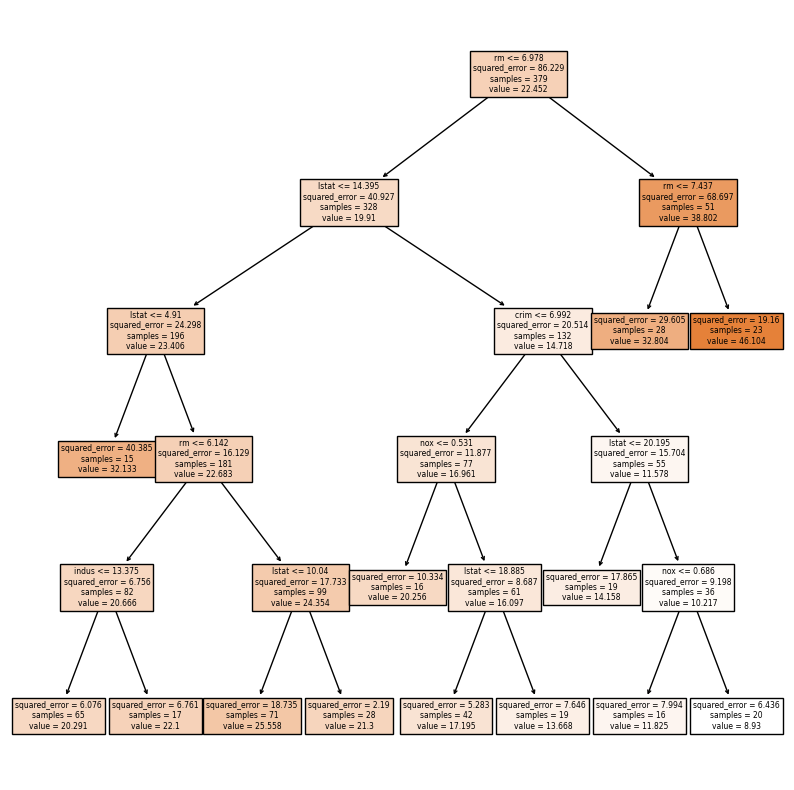

In [8]:
# Tamanho da Figura.
plt.rc('figure', figsize=(10,10))

# Plotando a Árvore de Regressão através do tree.plot_tree().
tree.plot_tree(regr, # Árvore utilizada.
               feature_names=list(X_train.columns), # nome das Colunas.
               filled=True) # Colorir a árvore.

plt.savefig("Arvore_regr1.jpg") # Salvando a imagem.

plt.show() # Exibir a árvore.

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [9]:
# Realizando a Pós-Poda, identificando 'ccp_alphas' e 'impurities'.
path = regr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([ 0.        ,  0.11638504,  0.19656464,  0.42933837,  0.50970317,
         0.57863957,  0.9605093 ,  1.6093041 ,  2.45282171,  3.264228  ,
         5.89427598, 15.70907589, 41.56529665]),
 'impurities': array([12.94279164, 13.05917668, 13.25574132, 13.6850797 , 14.19478287,
        14.77342244, 15.73393174, 17.34323584, 19.79605755, 23.06028555,
        28.95456153, 44.66363743, 86.22893408])}

Text(0, 0.5, 'Impureza total das folhas')

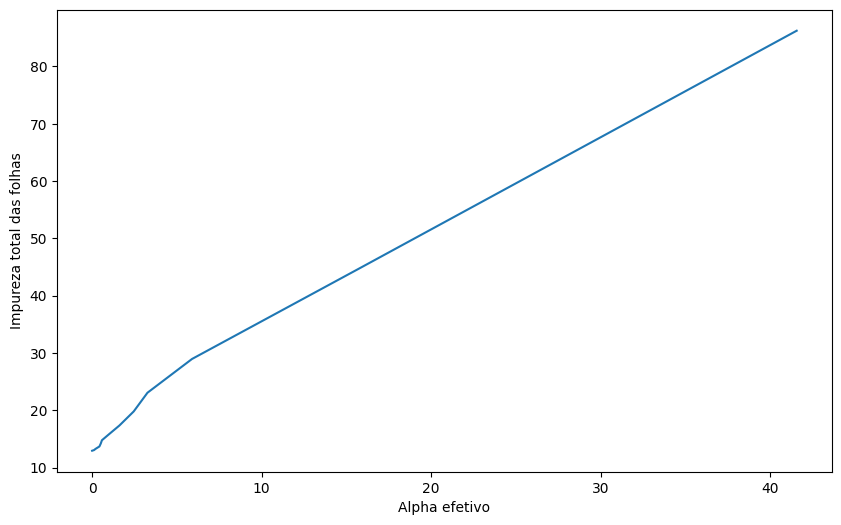

In [10]:
# Tamanho da Figura.
plt.figure(figsize=(10,6))

# Gráfico 'ccp_alphas' x 'impurities'
plt.plot(ccp_alphas,impurities) # Plotagem do gráfico.
plt.xlabel("Alpha efetivo") # Nomeando label x.
plt.ylabel("Impureza total das folhas") # Nomeando label y.

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [11]:
# Criando lista para inserir os clfs.
clfs = []

# Utilizando loop 'for' para recolher os clfs.
for ccp_alpha in ccp_alphas: # buscar ccp_alpha de cada ccp_alphas.
    clf = DecisionTreeRegressor(random_state=123, ccp_alpha=ccp_alpha) # Criando árvore para cada ccp_alpha.
    clf.fit(X_train, y_train) # Treinando a árvore.
    clfs.append(clf) # Inserindo clf dentro da lista clfs.

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [12]:
# Calculo do MSE do banco de dados de treino e de teste.
train_MSE = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_MSE  = [mean_squared_error(y_test , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

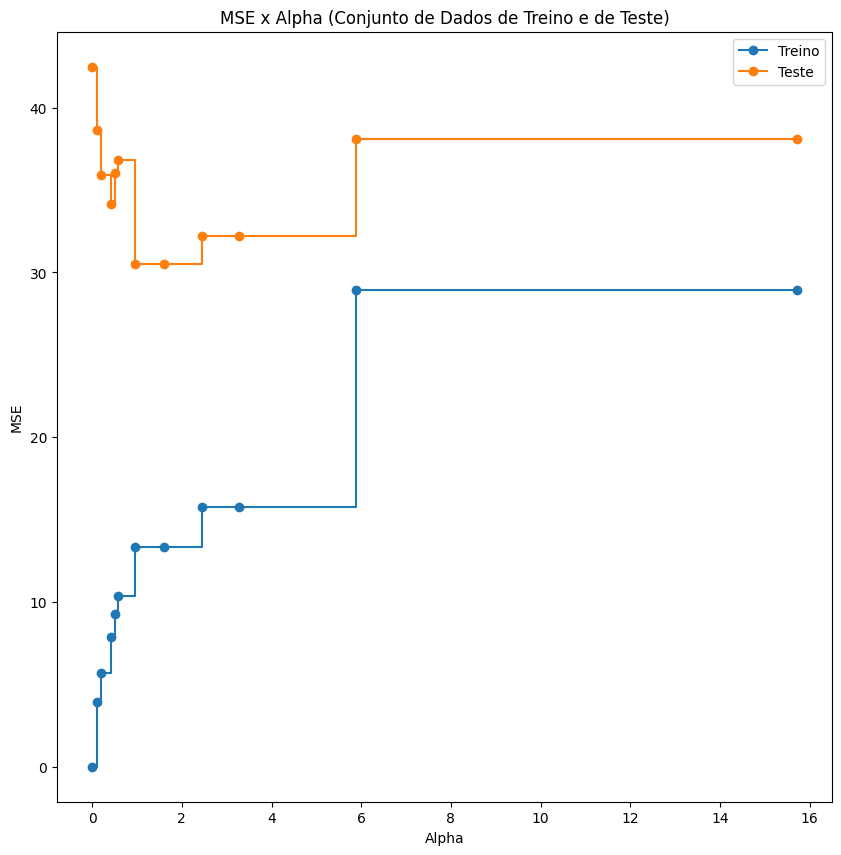

In [13]:
# Criando subplots() para inserir o gráfico e definindo nomes para os xlabel, ylabel e título.
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha (Conjunto de Dados de Treino e de Teste)")

# Plotando o primeiro Gráfico.
ax.plot(ccp_alphas[:-1], # Inserindo ccp_alphas, desconsiderando o mais profundo.
        train_MSE[:-1], # Inserindo train_MSE, desconsiderando o mais profundo.
        marker='o', # Adicionando um ponto para cada dado do conjunto de dados.
        label='Treino', # Label Treino.
        drawstyle="steps-post") # Configurando para gráfico escada.

# Plotando o segundo Gráfico.
ax.plot(ccp_alphas[:-1], # Inserindo ccp_alphas, desconsiderando o mais profundo.
        test_MSE[:-1], # Inserindo train_MSE, desconsiderando o mais profundo.
        marker='o', # Adicionando um ponto para cada dado do conjunto de dados.
        label='Teste', # Label Teste.
        drawstyle="steps-post") # Configurando para gráfico escada.

ax.legend() # Adicionando legenda ('Treino' e 'Teste')
plt.show() # Exibir gráfico.

In [14]:
# Criando árvore regressiva com ccp_alpha=1.6 e treinando a árvore.
arvore_final = DecisionTreeRegressor(random_state=123, ccp_alpha=1.6)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1.6, random_state=123)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [15]:
# Calculo do R-quadrado.
R2 = arvore_final.score(X_test, y_test)
print(f'R-quadrado na base de testes: {R2:.2f}')

R-quadrado na base de testes: 0.61


### 7. Visualize esta árvore.

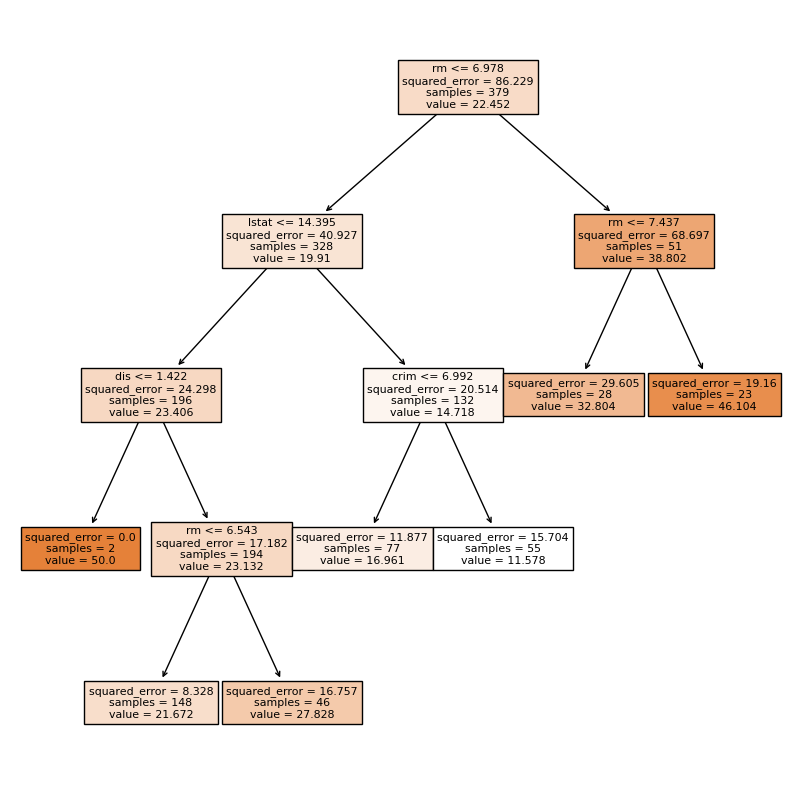

In [16]:
# Tamanho da Figura.
plt.rc('figure', figsize=(10,10))

# Plotando a Árvore de Regressão através do tree.plot_tree().
tree.plot_tree(arvore_final, # Árvore utilizada.
               feature_names=list(X_train.columns), # nome das Colunas.
               filled=True) # Colorir a árvore.

plt.savefig("Arvore_Final.jpg") # Salvando a imagem.

plt.show() # Exibir a árvore.